In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
missing_values = ["n/a", "na", "--", "?"]
df = pd.read_csv('C:/Users/kanka/OneDrive/Desktop/Final Project/Datasets/germancredit.csv',  delimiter=',', na_values = missing_values)

df



,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


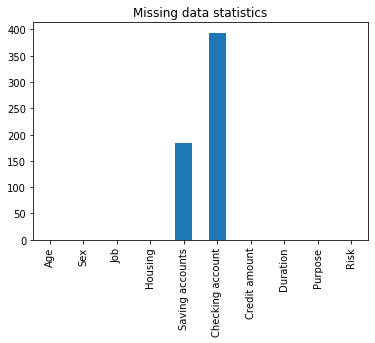

In [4]:
c = df.isnull().sum()
plt.title("Missing data statistics")
c.plot(kind='bar')
print(c)

In [5]:
for col in ['Saving accounts', 'Checking account']:
    df[col].fillna('none', inplace=True)

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64


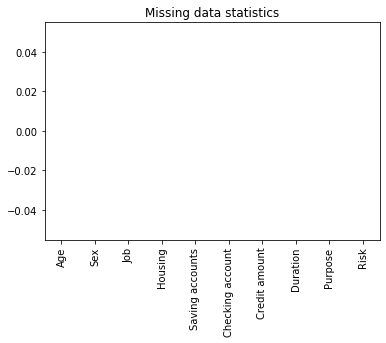

In [6]:
c = df.isnull().sum()
plt.title("Missing data statistics")
c.plot(kind='bar')
print(c)

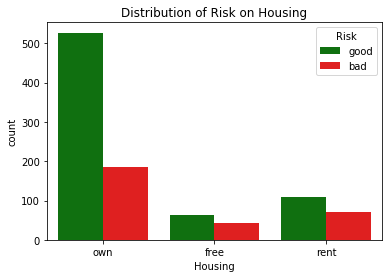

In [15]:
sns.countplot(x="Housing", hue="Risk", data=df, palette=["green", "red"])
plt.title('Distribution of Risk on Housing')
plt.show()

###### good, bad = df['Risk'].value_counts()
print('Count of Good Credits Loan', good)
print('Count of Bad Credits Loan', bad)
sns.countplot(x="Risk", hue="Risk", data=df)
plt.show()

C:\Users\kanka\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


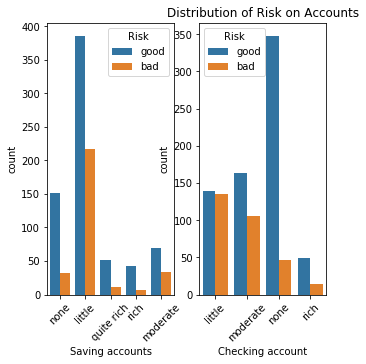

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(5,5))
sns.countplot(x="Saving accounts", hue="Risk", data=df, ax=ax1)
sns.countplot(x="Checking account", hue="Risk", data=df, ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.title('Distribution of Risk on Accounts')

fig.show()

Text(0, 0.5, 'Density')

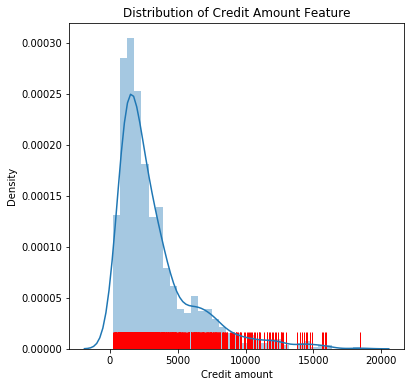

In [19]:
plt.figure(figsize=(6,6))
plt.title('Distribution of Credit Amount Feature')
sns.distplot(df['Credit amount'], rug= True, rug_kws={'color': 'red'}) 
#Hist = False or rug = True (give data points details)
plt.ylabel('Density')

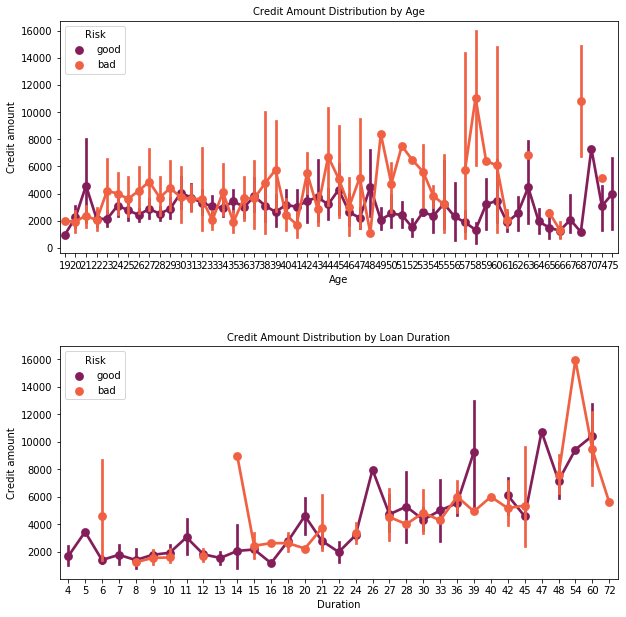

In [18]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10))

sns.pointplot(x="Age", y="Credit amount", data=df, hue="Risk", palette="rocket", ax=ax1)
sns.pointplot(x="Duration", y="Credit amount", data=df, hue="Risk", palette="rocket", ax=ax2)

ax1.set_title("Credit Amount Distribution by Age", fontsize=10)
ax2.set_title("Credit Amount Distribution by Loan Duration", fontsize=10)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)
plt.show()

Count of Good Credits 700
Count of Bad Credits 300


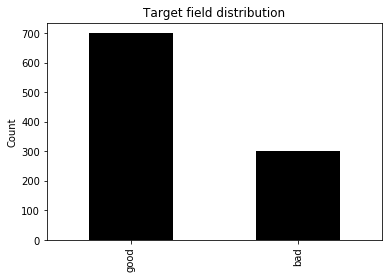

In [31]:
good, bad = df['Risk'].value_counts()
print('Count of Good Credits', good)
print('Count of Bad Credits', bad)
df['Risk'].value_counts().plot(kind='bar', title='Target field distribution', color='black')

plt.ylabel('Count')
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Box-plot for German Credit Risk')

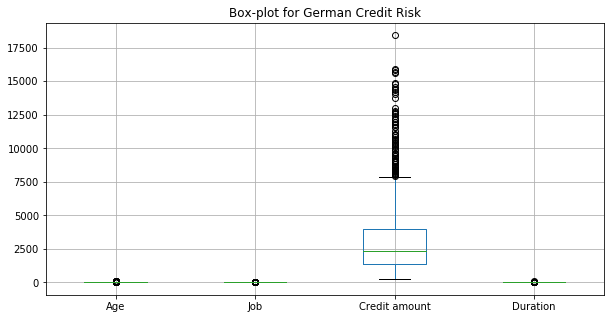

In [21]:
plt.figure(figsize=(10, 5))
print (df.boxplot() )
plt.title('Box-plot for German Credit Risk')

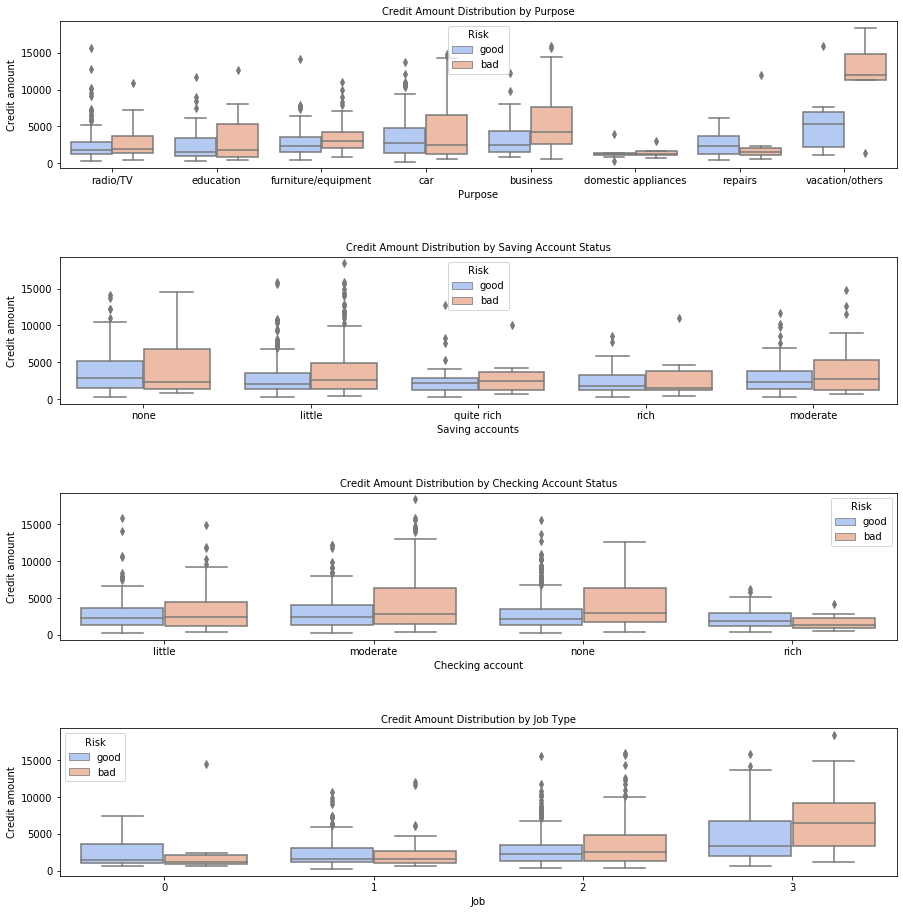

In [33]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,25))

sns.boxplot(x="Purpose", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax1)
sns.boxplot(x="Saving accounts", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax2)
sns.boxplot(x="Checking account", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax3)
sns.boxplot(x="Job", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax4)

ax1.set_title("Credit Amount Distribution by Purpose", fontsize=10)
ax2.set_title("Credit Amount Distribution by Saving Account Status", fontsize=10)
ax3.set_title("Credit Amount Distribution by Checking Account Status", fontsize=10)
ax4.set_title("Credit Amount Distribution by Job Type", fontsize=10)

plt.subplots_adjust(hspace = 0.6, top = 0.6)
plt.show()

In [22]:
# getting dummies for all the categorical variables
dummies_columns = ['Purpose', 'Sex', 'Housing', 'Saving accounts', 'Checking account']
for col in dummies_columns:
    df = df.merge(pd.get_dummies(df[col], drop_first=True, prefix=str(col)), left_index=True, right_index=True) 

# encoding risk as binary
r = {"good":0, "bad": 1}
df['Risk'] = df['Risk'].map(r)

# drop redundant variables
columns_to_drop = ['Purpose','Sex','Housing','Saving accounts','Checking account']
df.drop(columns_to_drop, axis=1, inplace=True)

df.head()


,Age,Job,Credit amount,Duration,Risk,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,...,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_none,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_none,Checking account_rich
0,67,2,1169,6,0,0,0,0,0,1,...,1,1,0,0,1,0,0,0,0,0
1,22,2,5951,48,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,49,1,2096,12,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,45,2,7882,42,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,53,2,4870,24,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


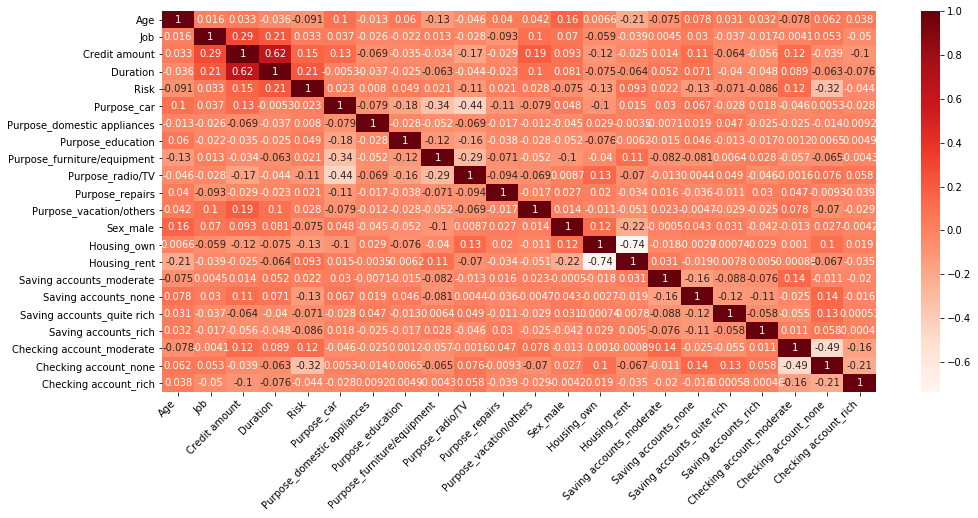

In [24]:
plt.figure(figsize=(16,7))
cor = df.corr(method='pearson')
ax = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

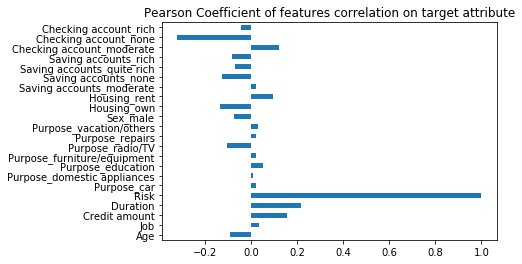

In [26]:
cor_target = (cor["Risk"])
plt.title("Pearson Coefficient of features correlation on target attribute")
cor_target.plot(kind='barh')

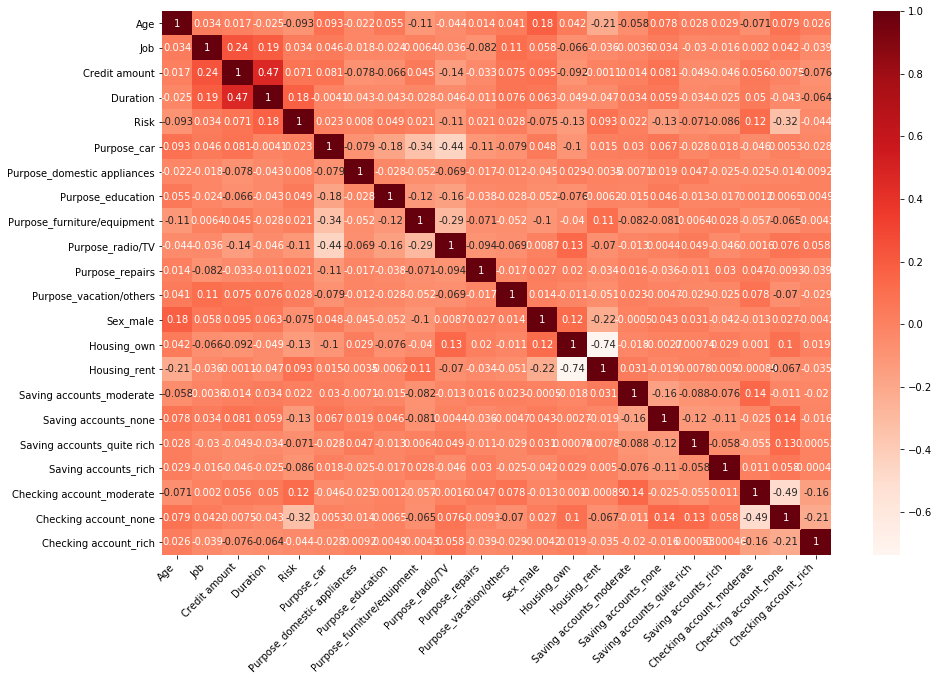

In [29]:
plt.figure(figsize=(15,10))
kendall_corr = df.corr(method='kendall')
ax = sns.heatmap(kendall_corr, annot=True, cmap=plt.cm.Reds)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

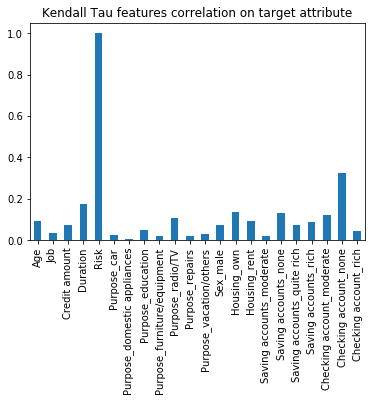

In [40]:
kendall_corr_target = abs(kendall_corr["Risk"])
plt.title("Kendall Tau features correlation on target attribute")
kendall_corr_target.plot(kind='bar')

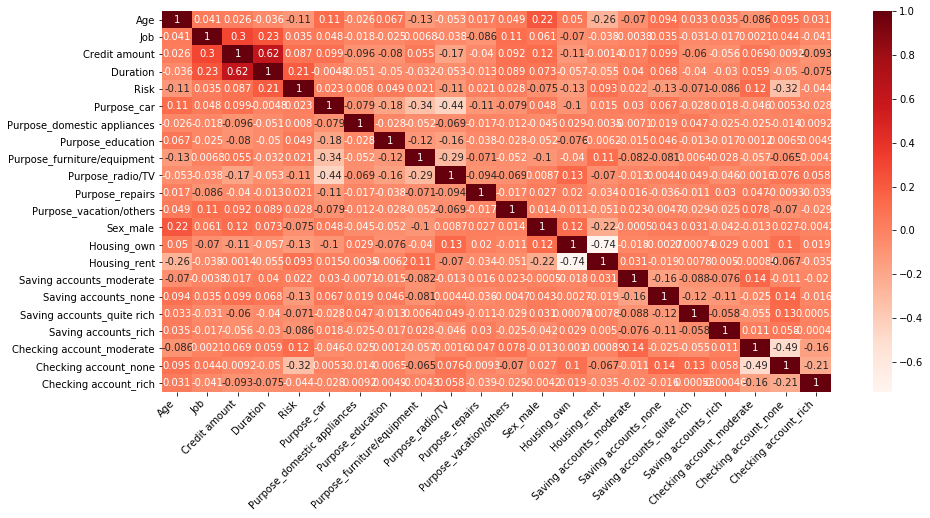

In [27]:
plt.figure(figsize=(15,7))
spearman_corr = df.corr(method='spearman')
ax = sns.heatmap(spearman_corr, annot=True, cmap=plt.cm.Reds)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

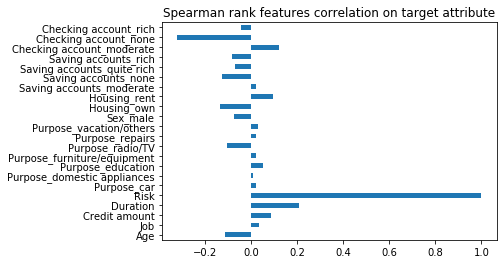

In [28]:
spearman_corr_target = (spearman_corr["Risk"])
plt.title("Spearman rank features correlation on target attribute")
spearman_corr_target.plot(kind='barh')

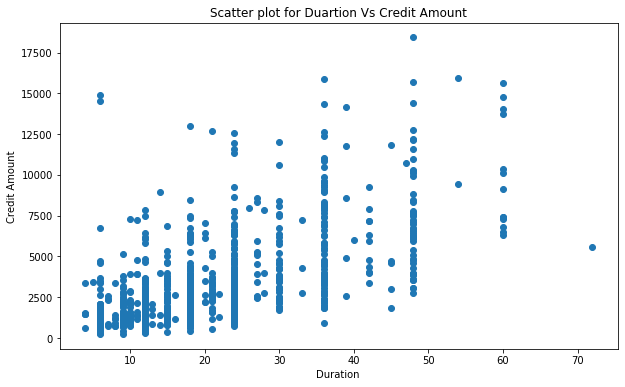

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Duration'], df['Credit amount'])
ax.set_xlabel('Duration ')
ax.set_ylabel('Credit Amount')
plt.title('Scatter plot for Duartion Vs Credit Amount')
#plt.xlim([2,20])
#plt.ylim([2,20])
plt.show()

In [32]:
x= df.drop(['Risk'], axis=1)
x
y = df['Risk']
print(x)


     Age  Job  Credit amount  Duration  Purpose_car  \
0     67    2           1169         6            0   
1     22    2           5951        48            0   
2     49    1           2096        12            0   
3     45    2           7882        42            0   
4     53    2           4870        24            1   
..   ...  ...            ...       ...          ...   
995   31    1           1736        12            0   
996   40    3           3857        30            1   
997   38    2            804        12            0   
998   23    2           1845        45            0   
999   27    2           4576        45            1   

     Purpose_domestic appliances  Purpose_education  \
0                              0                  0   
1                              0                  0   
2                              0                  1   
3                              0                  0   
4                              0                  0   
..       

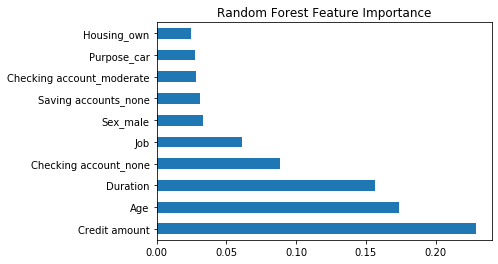

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x,y)
#print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=(df.drop('Risk', axis=1)).columns)
feat_importances.nlargest(10).plot(kind='barh')
#plt.xlim([0,0.01])
plt.title('Random Forest Feature Importance')
plt.show()

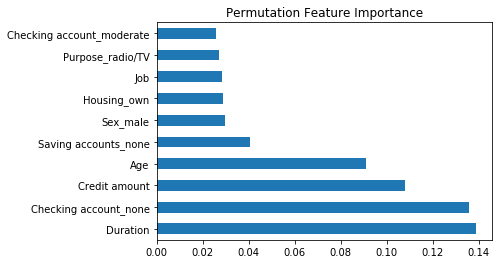

In [34]:
from sklearn.inspection import permutation_importance


# perform permutation importance
results = permutation_importance(model, x, y, scoring='accuracy')
# get importance
importance = results.importances_mean

Permutation_feat_importances = pd.Series(importance, index=(df.drop('Risk', axis=1)).columns)
Permutation_feat_importances.nlargest(10).plot(kind='barh')
plt.title('Permutation Feature Importance')
plt.show()